# EDA

In [37]:
import pandas as pd

df = pd.read_csv("uci_har_combined.csv")

# Ver estructura
print(df.shape)
print(df[['label', 'label_name']].value_counts().sort_index())


(10299, 563)
label  label_name        
1      WALKING               1722
2      WALKING_UPSTAIRS      1544
3      WALKING_DOWNSTAIRS    1406
4      SITTING               1777
5      STANDING              1906
6      LAYING                1944
Name: count, dtype: int64


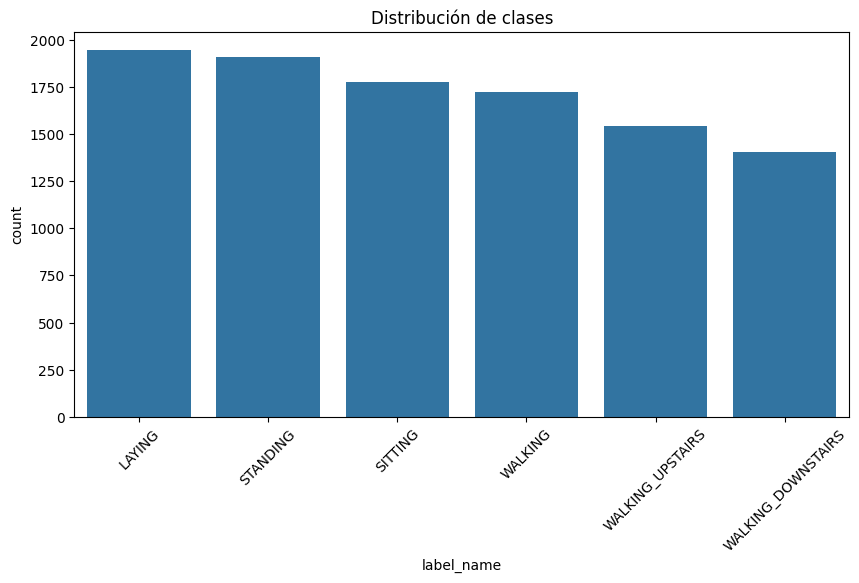

     count      mean       std  min       25%       50%       75%  max
0  10299.0  0.274347  0.067628 -1.0  0.262625  0.277174  0.288354  1.0
1  10299.0 -0.017743  0.037128 -1.0 -0.024902 -0.017162 -0.010625  1.0
2  10299.0 -0.108925  0.053033 -1.0 -0.121019 -0.108596 -0.097589  1.0
3  10299.0 -0.607784  0.438694 -1.0 -0.992360 -0.943030 -0.250293  1.0
4  10299.0 -0.510191  0.500240 -1.0 -0.976990 -0.835032 -0.057336  1.0
5  10299.0 -0.613064  0.403657 -1.0 -0.979137 -0.850773 -0.278737  1.0
6  10299.0 -0.633593  0.413333 -1.0 -0.993293 -0.948244 -0.302033  1.0
7  10299.0 -0.525697  0.484201 -1.0 -0.977017 -0.843670 -0.087405  1.0
8  10299.0 -0.614989  0.399034 -1.0 -0.979064 -0.845068 -0.288149  1.0
9  10299.0 -0.466732  0.538707 -1.0 -0.935788 -0.874825 -0.014641  1.0


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Número de ejemplos por clase
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='label_name', order=df['label_name'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribución de clases")
plt.show()

# Estadísticas generales
print(df.describe().T.head(10))


# Time Analysis

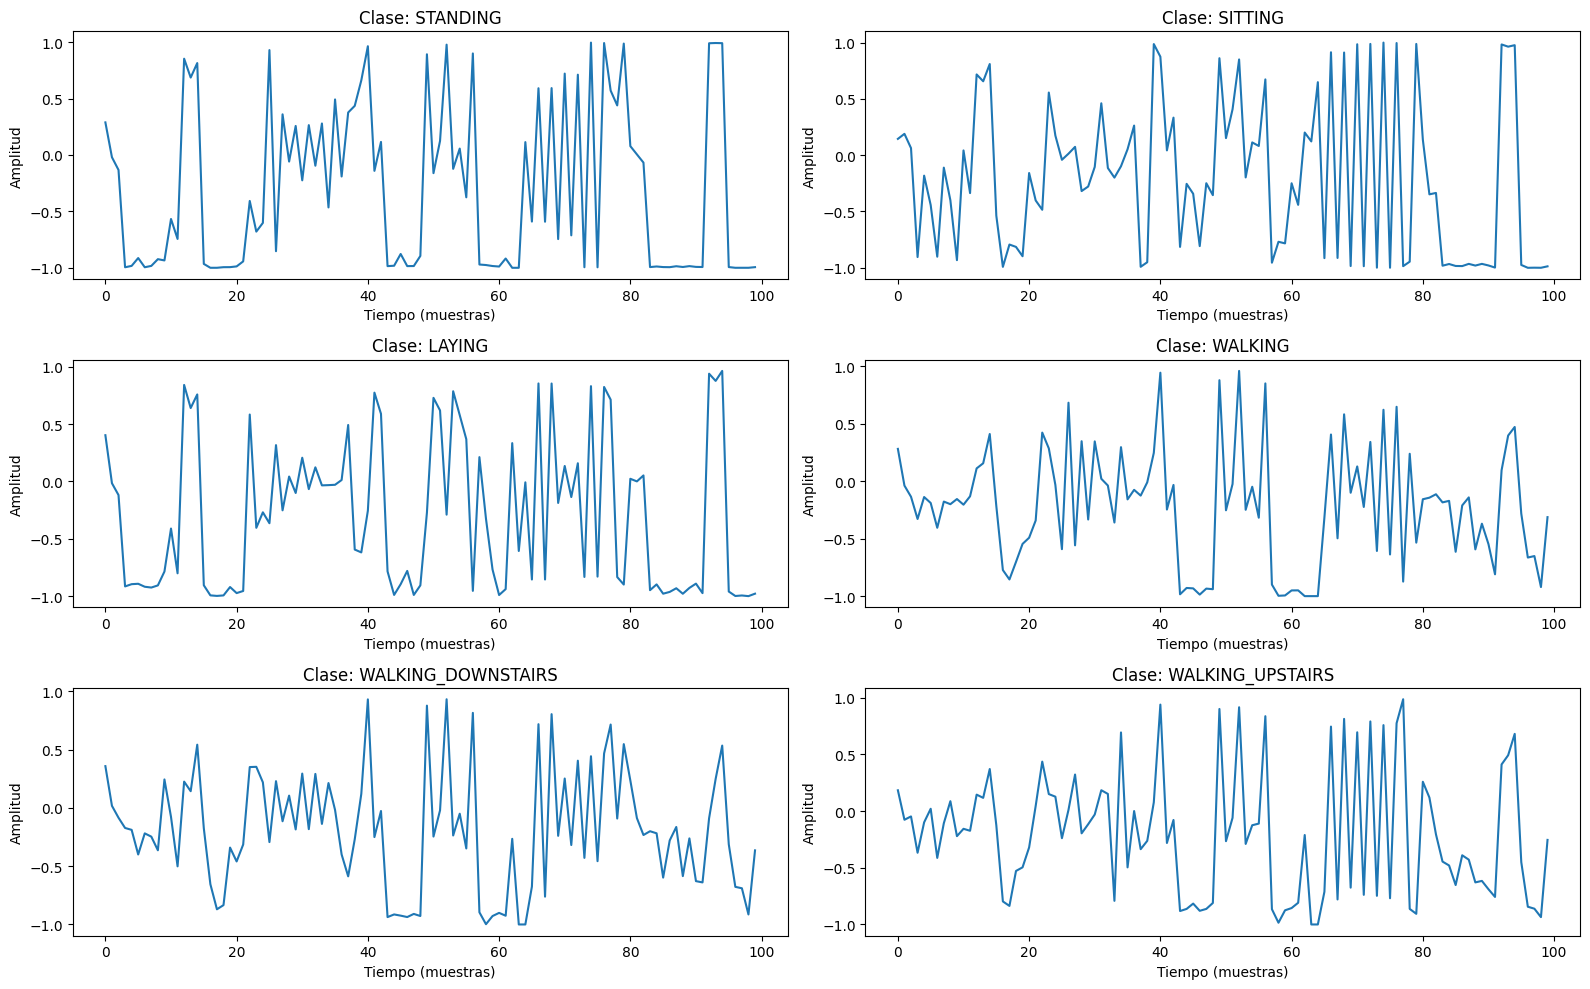

In [39]:
# Tomamos una muestra de cada clase
sample_per_class = df.groupby('label_name').head(1)

# Graficamos primeras 100 características por clase (tiempo simulado)
plt.figure(figsize=(16, 10))
for i, row in enumerate(sample_per_class.iterrows()):
    label = row[1]['label_name']
    signal = row[1].iloc[:100]
    plt.subplot(3, 2, i+1)
    plt.plot(signal.values)
    plt.title(f"Clase: {label}")
    plt.xlabel("Tiempo (muestras)")
    plt.ylabel("Amplitud")
plt.tight_layout()
plt.show()


# Frequency Analysis

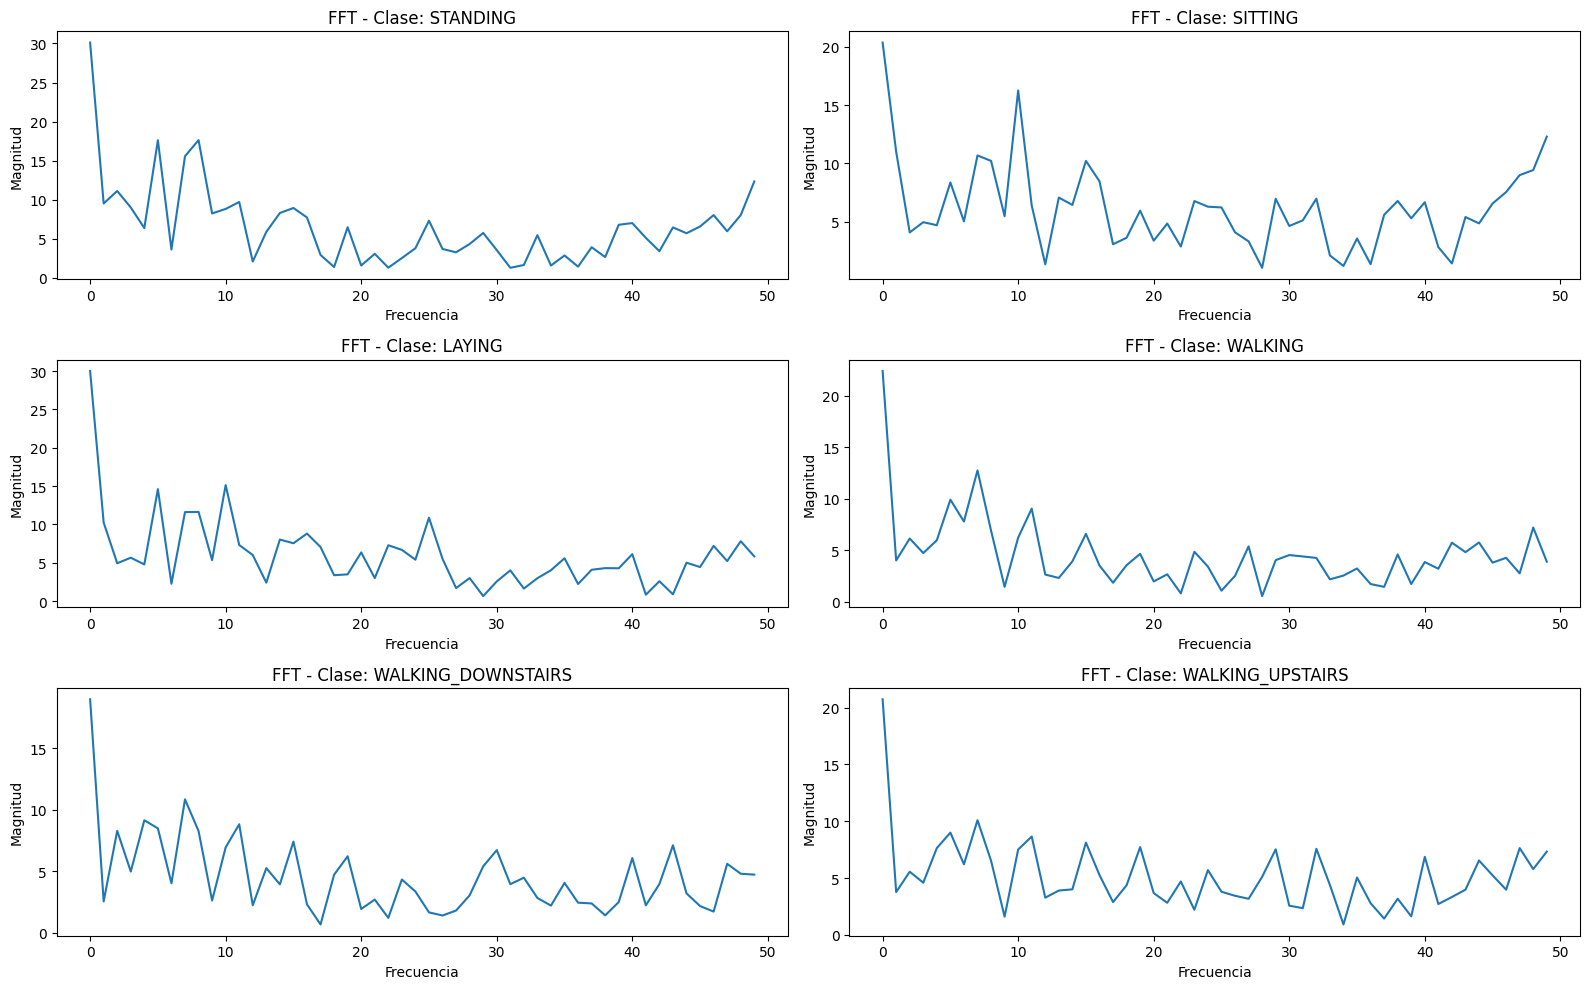

In [40]:
from scipy.fft import fft
import numpy as np

# Usamos la primer señal multivariable de cada clase
plt.figure(figsize=(16, 10))
for i, row in enumerate(sample_per_class.iterrows()):
    label = row[1]['label_name']
    signal = row[1].iloc[:100].values
    freq = np.abs(fft(signal))[:50]
    plt.subplot(3, 2, i+1)
    plt.plot(freq)
    plt.title(f"FFT - Clase: {label}")
    plt.xlabel("Frecuencia")
    plt.ylabel("Magnitud")
plt.tight_layout()
plt.show()


# Training Random Forest Time Domain

Random Forest - Time Domain
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       406
           SITTING       0.97      0.95      0.96       377
          STANDING       0.95      0.96      0.96       354
           WALKING       0.99      0.99      0.99       369
WALKING_DOWNSTAIRS       0.98      0.97      0.97       284
  WALKING_UPSTAIRS       0.97      0.98      0.98       270

          accuracy                           0.98      2060
         macro avg       0.98      0.98      0.98      2060
      weighted avg       0.98      0.98      0.98      2060



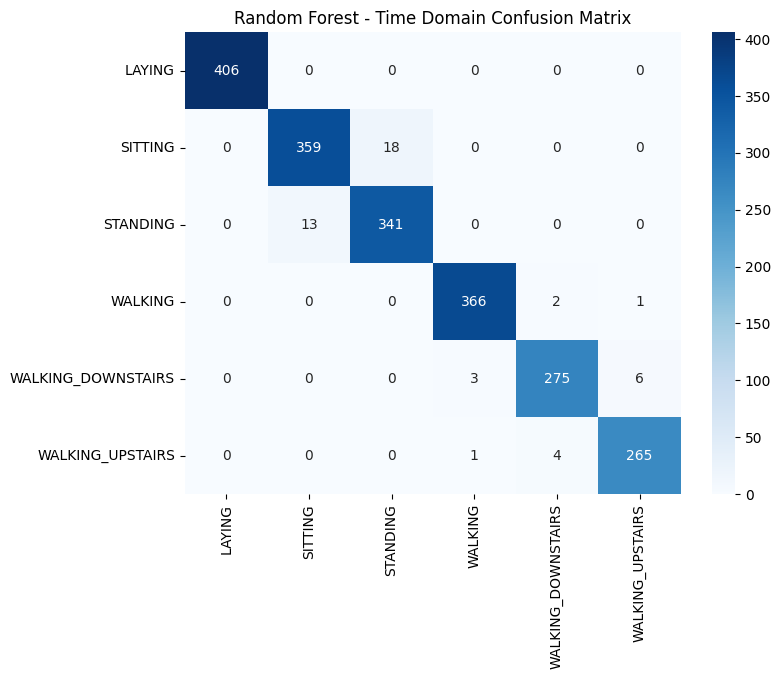

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop(columns=['label', 'label_name'])
y = df['label_name']

# Train-Test Split (Time domain already loaded)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Training
rf_time = RandomForestClassifier(n_estimators=100, random_state=42)
rf_time.fit(X_train, y_train)
y_pred_time_rf = rf_time.predict(X_test)

# Metrics
print("Random Forest - Time Domain")
print(classification_report(y_test, y_pred_time_rf))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_time_rf), annot=True, fmt='d', cmap='Blues', xticklabels=rf_time.classes_, yticklabels=rf_time.classes_)
plt.title("Random Forest - Time Domain Confusion Matrix")
plt.show()


# Training Random Forest Frequency Domain 

Random Forest - Frequency Domain
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       406
           SITTING       0.88      0.86      0.87       377
          STANDING       0.86      0.88      0.87       354
           WALKING       0.96      0.96      0.96       369
WALKING_DOWNSTAIRS       0.94      0.92      0.93       284
  WALKING_UPSTAIRS       0.94      0.97      0.95       270

          accuracy                           0.93      2060
         macro avg       0.93      0.93      0.93      2060
      weighted avg       0.93      0.93      0.93      2060



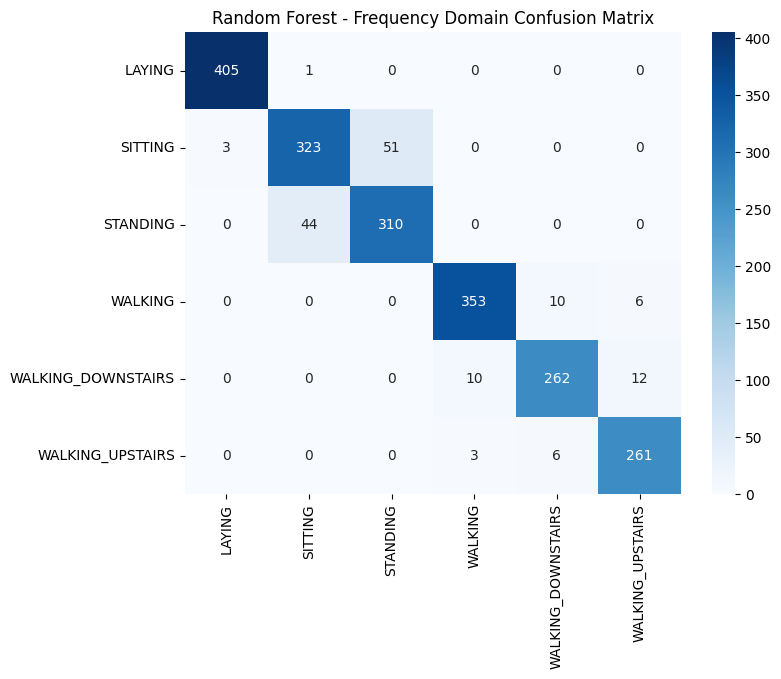

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop(columns=['label', 'label_name'])
y = df['label_name']

X_fft = np.abs(fft(X, axis=1))
X_fft = pd.DataFrame(X_fft, columns=[f"f_{i}" for i in range(X_fft.shape[1])])
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_fft, y, test_size=0.2, random_state=42)

# Random Forest Training
rf_freq = RandomForestClassifier(n_estimators=100, random_state=42)
rf_freq.fit(X_train, y_train)
y_pred_freq_rf = rf_freq.predict(X_test)

# Metrics
print("Random Forest - Frequency Domain")
print(classification_report(y_test, y_pred_freq_rf))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_freq_rf), annot=True, fmt='d', cmap='Blues', xticklabels=rf_freq.classes_, yticklabels=rf_freq.classes_)
plt.title("Random Forest - Frequency Domain Confusion Matrix")
plt.show()


# Training XGBoost Time Domain

XGBoost - Time Domain
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       0.99      1.00      0.99       270
           2       1.00      0.99      0.99       284
           3       0.98      0.99      0.98       377
           4       0.99      0.98      0.98       354
           5       1.00      1.00      1.00       406

    accuracy                           0.99      2060
   macro avg       0.99      0.99      0.99      2060
weighted avg       0.99      0.99      0.99      2060



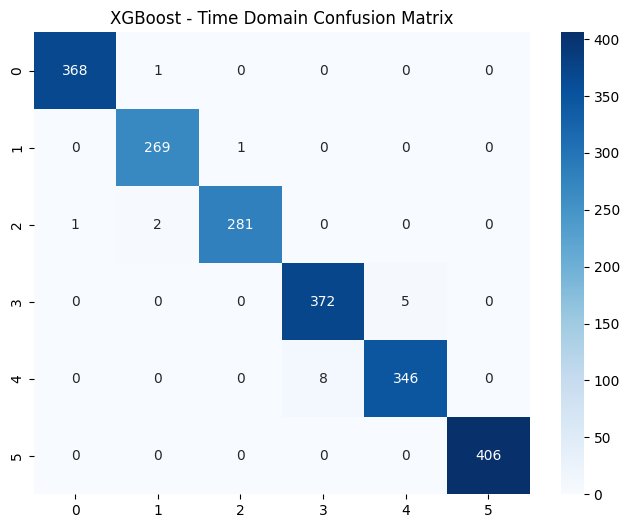

In [43]:
from xgboost import XGBClassifier
X = df.drop(columns=['label', 'label_name'])
y = df['label']-1 #Se resta -1 para que comience desde 0
X_train, X_test, y_train, y_test_xg = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Training
xgb_time = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_time.fit(X_train, y_train)
y_pred_time_xgb = xgb_time.predict(X_test)

# Metrics
print("XGBoost - Time Domain")
print(classification_report(y_test_xg, y_pred_time_xgb))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test_xg, y_pred_time_xgb), annot=True, fmt='d', cmap='Blues', xticklabels=xgb_time.classes_, yticklabels=xgb_time.classes_)
plt.title("XGBoost - Time Domain Confusion Matrix")
plt.show()

# Training XGBoost Frequency Domain

XGBoost - Frequency Domain
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       369
           1       0.97      0.96      0.96       270
           2       0.96      0.97      0.97       284
           3       0.92      0.92      0.92       377
           4       0.92      0.92      0.92       354
           5       1.00      0.99      0.99       406

    accuracy                           0.96      2060
   macro avg       0.96      0.96      0.96      2060
weighted avg       0.96      0.96      0.96      2060



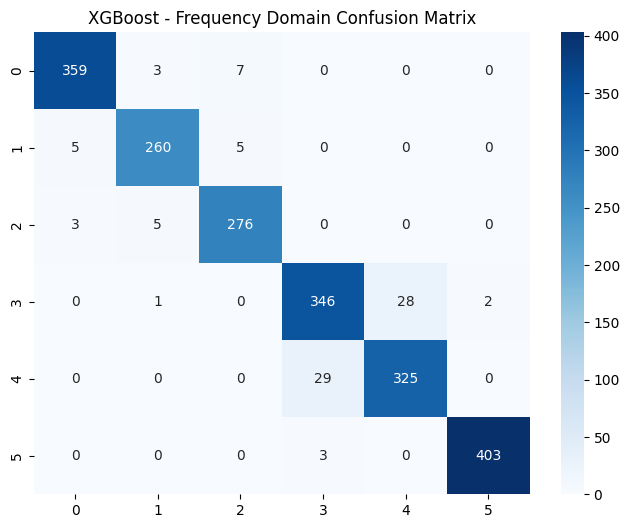

In [44]:
from xgboost import XGBClassifier
X = df.drop(columns=['label', 'label_name'])
y = df['label']-1 #Se resta -1 para que comience desde 0

# Apply FFT to each row
X_fft = np.abs(fft(X, axis=1))
X_fft = pd.DataFrame(X_fft, columns=[f"f_{i}" for i in range(X_fft.shape[1])])

# Train-Test Split
X_train, X_test, y_train, y_test_xg = train_test_split(X_fft, y, test_size=0.2, random_state=42)

# XGBoost Training
xgb_freq = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_freq.fit(X_train, y_train)
y_pred_freq_xgb = xgb_freq.predict(X_test)

# Metrics
print("XGBoost - Frequency Domain")
print(classification_report(y_test_xg, y_pred_freq_xgb))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test_xg, y_pred_freq_xgb), annot=True, fmt='d', cmap='Blues', xticklabels=xgb_freq.classes_, yticklabels=xgb_freq.classes_)
plt.title("XGBoost - Frequency Domain Confusion Matrix")
plt.show()


# Final Comparison

In [47]:
from sklearn.metrics import accuracy_score
print("Final Accuracy Comparison")
models = {
    "XGBoost - Time": accuracy_score(y_test_xg, y_pred_time_xgb),
    "XGBoost - Freq": accuracy_score(y_test_xg, y_pred_freq_xgb),
    "Random Forest - Time": accuracy_score(y_test, y_pred_time_rf),
    "Random Forest - Freq": accuracy_score(y_test, y_pred_freq_rf)
}

for name, acc in models.items():
    print(f"{name}: {acc:.4f}")


Final Accuracy Comparison
XGBoost - Time: 0.9913
XGBoost - Freq: 0.9558
Random Forest - Time: 0.9767
Random Forest - Freq: 0.9291
